In [1]:
import os
import sys
import joblib
import FE_0823 as FE
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(15,10)
sns.set(rc={'figure.figsize':(20,10)})
plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
sale = pd.read_excel(os.path.join('..', '0.Data', '01_제공데이터', 'sale_data_v05_0828.xlsx'))
meta = pd.read_excel(os.path.join('..', '0.Data', '01_제공데이터', 'sale_meta_v04_0823.xlsx'))
item = pd.read_excel(os.path.join('..', '0.Data', '01_제공데이터', 'item_meta_v04_0828.xlsx'))

# 1. 동일상품시간차

: 동일 상품 별 시간 간격 → 얼마나 오랜만에 그 상품을 다시 판매방송하는 것에 대한 변수

-> 해당 상품의 방송일을 diff로 구해주면됨

In [79]:
sale['방송일'] = sale['방송일시'].dt.date

In [21]:
temp = sale.groupby(['NEW상품명'])['방송일'].unique().reset_index()

In [46]:
t = sale.groupby(['NEW상품명','방송일']).count().reset_index()[['NEW상품명', '방송일']]

In [70]:
total = []
for item in tqdm(t['NEW상품명'].unique()):
    timediff = t.loc[t['NEW상품명'] == item, '방송일']
    a = pd.DataFrame(list(zip(timediff, timediff.diff())))
    a['NEW상품명'] = item
    total.extend(a.values)

100%|██████████| 1364/1364 [00:02<00:00, 458.05it/s]


In [72]:
timediff = pd.DataFrame(total, columns = ['방송일', '방송시간차', 'NEW상품명'])

In [97]:
timediff.loc[timediff['방송시간차'].isnull(), '방송시간차'] = 0

In [124]:
timediff['방송시간차'] = timediff['방송시간차'].apply(lambda x : x.days if x != 0 else x)

In [136]:
sale.merge(timediff, on = ['방송일', 'NEW상품명'], how = 'left').head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,결제방법,단위,브랜드,옵션,종류,방송일,방송시간차
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,865.0,테이트 남성 셀린니트 3종,0.0,3종,테이트,NaN,0,2019-01-01,0.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,866.0,테이트 여성 셀린니트 3종,0.0,3종,테이트,NaN,0,2019-01-01,0.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,865.0,테이트 남성 셀린니트 3종,0.0,3종,테이트,NaN,0,2019-01-01,0.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,866.0,테이트 여성 셀린니트 3종,0.0,3종,테이트,NaN,0,2019-01-01,0.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,865.0,테이트 남성 셀린니트 3종,0.0,3종,테이트,NaN,0,2019-01-01,0.0


# 2. 상품별 취급액 추세

In [87]:
sale.loc[sale['NEW상품명'].isnull(), 'NEW상품명'] = sale.loc[sale['NEW상품명'].isnull(), '상품명']

In [88]:
sale['방송월'] = sale['방송일시'].dt.month

In [98]:
temp = sale.groupby(['NEW상품명', '방송일'])['취급액'].sum().reset_index()

In [101]:
temp.loc[temp['NEW상품명'] == '안동간고등어 20팩']

,NEW상품명,방송일,취급액
5911,안동간고등어 20팩,2019-01-02,155211000.000
5912,안동간고등어 20팩,2019-01-04,125512000.000
5913,안동간고등어 20팩,2019-01-07,132025000.000
5914,안동간고등어 20팩,2019-01-09,122270000.000
5915,안동간고등어 20팩,2019-01-10,120600000.000
...,...,...,...
6012,안동간고등어 20팩,2019-12-21,186509000.000
6013,안동간고등어 20팩,2019-12-26,155254000.000
6014,안동간고등어 20팩,2019-12-28,110684000.000
6015,안동간고등어 20팩,2019-12-30,118920000.000


In [105]:
y = list(temp.loc[temp['NEW상품명'] == '안동간고등어 20팩', '취급액'])
x = np.arange(len(y))

In [106]:
z = np.polyfit(x, y, 1)

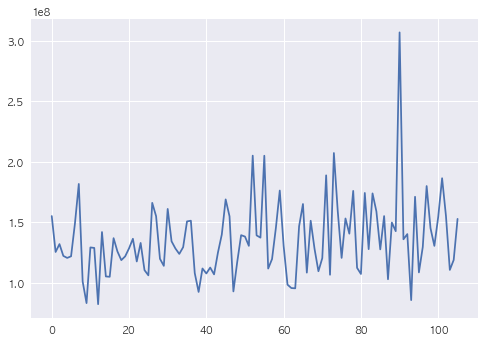

In [107]:
plt.plot(y)

In [141]:
temp.loc[temp['NEW상품명'] == '히팅맘 스마트 리모컨 히터']

,NEW상품명,방송일,취급액
10538,히팅맘 스마트 리모컨 히터,2019-11-21,21950000.000


In [201]:
temp['방송일'] = pd.to_datetime(temp['방송일'])

In [139]:
y = list(np.log(temp.loc[(temp['NEW상품명'] == '히팅맘 스마트 리모컨 히터') & (temp['방송일'] < '2019-07-01') & ('2019-06-01' < temp['방송일']), '취급액']))
x = np.arange(len(y))
z = np.polyfit(x, y, 1)
plt.plot(y)
plt.plot([z[0]*i + z[1] for i in range(len(y))])

TypeError: expected non-empty vector for x

In [144]:
temp = sale.groupby(['상품군', '방송일'])['취급액'].sum().reset_index()

In [156]:
temp

,상품군,방송일,취급액
0,가구,2019-02-01,169247000.000
1,가구,2019-02-04,150677000.000
2,가구,2019-02-06,178832000.000
3,가구,2019-02-08,217876000.000
4,가구,2019-02-12,164505000.000
...,...,...,...
3169,침구,2019-11-11,96350000.000
3170,침구,2019-11-13,108818000.000
3171,침구,2019-11-19,110848000.000
3172,침구,2019-11-21,122006000.000


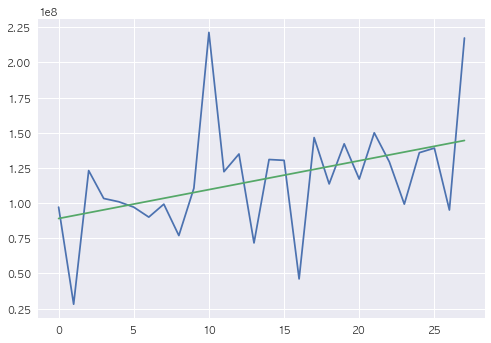

In [158]:
y = list(temp.loc[(temp['상품군'] == '침구') & (temp['방송일'] < '2019-07-01') & ('2019-05-01' < temp['방송일']), '취급액'])
x = np.arange(len(y))
z = np.polyfit(x, y, 1)
plt.plot(y)
plt.plot([z[0]*i + z[1] for i in range(len(y))])

In [207]:
sale['방송일'] = pd.to_datetime(sale['방송일'])

In [252]:
sale['최근3개월상품군추세'] = None
sale['log최근3개월상품군추세'] = None 

In [254]:
from datetime import datetime, timedelta
for cate, date in tqdm(sale[['상품군', '방송일']].drop_duplicates().values):
    y = list(temp.loc[(temp['상품군'] == cate) & (temp['방송일'] < date) & (date - timedelta(days = 90) < temp['방송일']), '취급액'])
    x = np.arange(len(y))
    try:
        z = np.polyfit(x, y, 1)[0]
    except:
        z = 0
    
    log_y = np.log(list(temp.loc[(temp['상품군'] == cate) & (temp['방송일'] < date) & (date - timedelta(days = 90) < temp['방송일']), '취급액'] + 1))
    log_x = np.arange(len(y))
    try:
        log_z = np.polyfit(log_x, log_y, 1)[0]
    except:
        log_z = 0
    
    sale.loc[(sale['상품군'] == cate) & (sale['방송일'] == date), '최근3개월상품군추세'] = z
    sale.loc[(sale['상품군'] == cate) & (sale['방송일'] == date), 'log최근3개월상품군추세'] = log_z
    

  0%|          | 0/3174 [00:00<?, ?it/s]/Users/jinseok/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:630: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale
100%|██████████| 3174/3174 [00:33<00:00, 95.24it/s] 


In [270]:
sale

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,NEW상품코드,NEW상품명,...,옵션,종류,브랜드,상품명다시,단위,할인율,방송일,방송월,최근3개월상품군추세,log최근3개월상품군추세
0,2019-01-01 06:00:00,20.000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.000,865.000,테이트 남성 셀린니트 3종,...,NaN,0,테이트,남성 셀린니트,3종,0.000,2019-01-01,1,0,0
1,2019-01-01 06:00:00,nan,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.000,866.000,테이트 여성 셀린니트 3종,...,NaN,0,테이트,여성 셀린니트,3종,0.000,2019-01-01,1,0,0
2,2019-01-01 06:20:00,20.000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.000,865.000,테이트 남성 셀린니트 3종,...,NaN,0,테이트,남성 셀린니트,3종,0.000,2019-01-01,1,0,0
3,2019-01-01 06:20:00,nan,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.000,866.000,테이트 여성 셀린니트 3종,...,NaN,0,테이트,여성 셀린니트,3종,0.000,2019-01-01,1,0,0
4,2019-01-01 06:40:00,20.000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.000,865.000,테이트 남성 셀린니트 3종,...,NaN,0,테이트,남성 셀린니트,3종,0.000,2019-01-01,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38304,2020-01-01 00:20:00,20.000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,nan,nan,삼성화재 행복한파트너 주택화재보험(1912),...,NaN,NaN,NaN,NaN,NaN,None,2020-01-01,1,0.000,0.000
38305,2020-01-01 00:40:00,20.000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,nan,nan,삼성화재 행복한파트너 주택화재보험(1912),...,NaN,NaN,NaN,NaN,NaN,None,2020-01-01,1,0.000,0.000
38306,2020-01-01 01:00:00,20.000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,nan,nan,삼성화재 행복한파트너 주택화재보험(1912),...,NaN,NaN,NaN,NaN,NaN,None,2020-01-01,1,0.000,0.000
38307,2020-01-01 01:20:00,20.000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,nan,nan,더케이 예다함 상조서비스(티포트),...,NaN,NaN,NaN,NaN,NaN,None,2020-01-01,1,0.000,0.000


# 주문량, 할인율

In [6]:
item.shape

(1364, 15)

In [8]:
item.sort_values('NEW_최고-최저', ascending = False).head(20)

,NEW상품코드,NEW상품명,상품군,NEW_최고판매단가,NEW_최저판매단가,NEW_평균판매단가,NEW_중간판매단가,NEW_최고-최저,NEW_분산,NEW_표준편차,상품군_가격대,전체_가격대,상품명다시,브랜드,단위
1129,1129,LG 울트라HD TV 70인치,가전,2990000,2400000,2670000.000,2690000,590000,43093333333.333,207589.338,2,4,울트라HD TV,LG,70인치
1126,1126,LG 울트라HD TV 75인치,가전,3190000,2700000,2925384.615,2900000,490000,28026923076.923,167412.434,2,4,울트라HD TV,LG,75인치
683,683,이누스바스 시공패키지,가구,3150000,2682000,2911750.000,2907500,468000,40032250000.000,200080.609,2,4,시공패키지,이누스바스,NaN
1128,1128,LG 울트라HD TV 65인치,가전,2130000,1690000,1863684.211,1900000,440000,23613450292.398,153666.686,2,4,울트라HD TV,LG,65인치
998,998,한샘 하이바스 내추럴 하부장 + 키큰장,가구,3990000,3591000,3790500.000,3790500,399000,53067000000.000,230362.757,2,4,하이바스 내추럴,한샘,하부장 + 키큰장
76,76,대우전자 벽걸이 에어컨,가전,849000,459000,662333.333,654000,390000,25587878787.879,159962.117,0,4,벽걸이 에어컨,대우전자,NaN
997,997,한샘 하이바스 내추럴 기본형 + 키큰장,가구,3690000,3321000,3505500.000,3505500,369000,45387000000.000,213042.249,2,4,하이바스 내추럴,한샘,기본형 + 키큰장
999,999,한샘 하이바스 내추럴 하부장형,가구,3690000,3321000,3505500.000,3505500,369000,45387000000.000,213042.249,2,4,하이바스 내추럴,한샘,하부장형
1138,1138,LG 휘센 씽큐 에어컨 2IN1형,가전,2549000,2209000,2354000.000,2299000,340000,18916666666.667,137537.874,2,4,휘센 씽큐 에어컨 2IN1,LG,NaN
1137,1137,LG 퓨리케어 공기청정기,가전,1149000,809000,979000.000,979000,340000,23533333333.333,153405.780,1,4,퓨리케어 공기청정기,LG,NaN


In [9]:
# 상품가격의 최고 판매단가가 그 상품의 가격이라고 할 수 있음
# 상품가격의 최고-최저 차가 최고가격일 때보다 20% 이상 차이나면 단순 할인이 아닐 수도 있음
item.loc[item.apply(lambda x : x['NEW_최고-최저'] > x['NEW_최고판매단가'] * 0.2, axis = 1)]

,NEW상품코드,NEW상품명,상품군,NEW_최고판매단가,NEW_최저판매단가,NEW_평균판매단가,NEW_중간판매단가,NEW_최고-최저,NEW_분산,NEW_표준편차,상품군_가격대,전체_가격대,상품명다시,브랜드,단위
33,33,글라스락 글라스락 퍼플 클래식 유리밀폐용기세트,주방,78000,58000,68000.000,68000,20000,200000000.000,14142.136,1,2,글라스락 퍼플 클래식 유리밀폐용기세트,글라스락,NaN
37,37,까사마루 접이식 의자,생활용품,39900,19900,29900.000,29900,20000,200000000.000,14142.136,0,0,접이식 의자,까사마루,NaN
65,65,뉴트리원 다이어트 구미,건강기능,79000,59000,69000.000,69000,20000,100000000.000,10000.000,1,2,다이어트 구미,뉴트리원,NaN
76,76,대우전자 벽걸이 에어컨,가전,849000,459000,662333.333,654000,390000,25587878787.879,159962.117,0,4,벽걸이 에어컨,대우전자,NaN
89,89,도스문도스 카이만 엠보 소가죽 체인 숄더백 1종,잡화,79000,59000,69000.000,69000,20000,100000000.000,10000.000,1,2,카이만 엠보 소가죽 체인 숄더백,도스문도스,1종
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,1157,NNF 트레이닝 세트,의류,49000,29000,39000.000,39000,20000,100000000.000,10000.000,0,0,트레이닝 세트,NNF,NaN
1195,1195,거창 특등급 사과 10kg,농수축,43900,28900,36400.000,36400,15000,112500000.000,10606.602,1,0,거창 특등급 사과,NaN,10kg
1237,1237,더 커진 거창 특등급 사과 10kg,농수축,49900,32900,41400.000,41400,17000,144500000.000,12020.815,1,1,더 커진 거창 특등급 사과,NaN,10kg
1269,1269,송도순의 2세대 홈밀맷돌,주방,188000,149000,168250.000,168000,39000,320250000.000,17895.530,2,3,송도순의 2세대 홈밀맷돌,NaN,NaN


In [ ]:
# 일단 가전의 경우에는 모델명이 달라버리는 문제가 발생해서 할인율을 다른 상품군과 똑같이 구하기는 애매함
# 모델명이 있는 것들은 다시 처리

In [10]:
# 모델명 추가로 item 개수가 늘어남
meta[['NEW상품명', '모델명']].drop_duplicates().sort_values('모델명')

,NEW상품명,모델명
1135,코지마 손목형 자동전자 혈압계,CBP-160
1638,LG 노트북 그램 15인치,15Z980-G.AR3DK
1639,LG 노트북 그램 15인치,15Z980-L.AR1DK
1656,LG 울트라HD TV 55인치,55UK6800HNC
1663,LG 울트라HD TV 55인치,55UM7900BNA
...,...,...
2037,AAB의 든든한 콩국수,NaN
2038,AAB의 소곱창 전골 800g 8팩,NaN
2039,AAE LA 갈비 7팩,NaN
2040,IH 옛 가마솥 세트,NaN


In [12]:
temp = item.merge(meta[['NEW상품명', '모델명']].drop_duplicates(), on = 'NEW상품명', how = 'left')

In [13]:
temp.shape

(1398, 16)

In [14]:
N_model = temp.loc[temp['모델명'].isnull()]

In [15]:
N_model.shape

(1308, 16)

In [16]:
# 약 1308개의 상품 중 87개의 아이템이 20퍼센트 이상의 할인율을 보임
# 그러나 이 경우에는 모델명이 따로 존재하지 않기 때문에 그냥 할인율이라고 봐도 무방!
N_model.loc[N_model.apply(lambda x : x['NEW_최고-최저'] > x['NEW_최고판매단가'] * 0.2, axis = 1)].sort_values('NEW_최고-최저', ascending = False)

,NEW상품코드,NEW상품명,상품군,NEW_최고판매단가,NEW_최저판매단가,NEW_평균판매단가,NEW_중간판매단가,NEW_최고-최저,NEW_분산,NEW_표준편차,상품군_가격대,전체_가격대,상품명다시,브랜드,단위,모델명
257,256,마리노블 밍크 롱코트,의류,499000,299000,399000.000,399000,200000,6666666666.667,81649.658,2,4,밍크 롱코트,마리노블,NaN,NaN
258,257,마리노블 밍크 퍼 베스트,의류,269000,199000,234000.000,234000,70000,2450000000.000,49497.475,2,4,밍크 퍼 베스트,마리노블,NaN,NaN
1109,1090,DIOR 선글라스(SIDERAL),잡화,239000,188000,213500.000,213500,51000,1300500000.000,36062.446,1,4,선글라스(SIDERAL),DIOR,NaN,NaN
658,645,오모떼 여성 프런트후크 프레쉬 데오브라,속옷,139000,89000,114000.000,114000,50000,1250000000.000,35355.339,2,3,여성 프런트후크 프레쉬 데오브라,오모떼,NaN,NaN
1303,1269,송도순의 2세대 홈밀맷돌,주방,188000,149000,168250.000,168000,39000,320250000.000,17895.530,2,3,송도순의 2세대 홈밀맷돌,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,803,코펜하겐럭스 세미와이드팬츠,의류,49900,39900,44900.000,44900,10000,50000000.000,7071.068,0,1,세미와이드팬츠,코펜하겐럭스,NaN,NaN
902,883,트레스패스 남성 에어 워킹화 + 러닝화 2종,잡화,49800,39800,44800.000,44800,10000,50000000.000,7071.068,0,0,남성 에어 워킹화 + 러닝화,트레스패스,2종,NaN
905,886,트레스패스 여성 에어 워킹화 + 러닝화 2종,잡화,49800,39800,44800.000,44800,10000,50000000.000,7071.068,0,0,여성 에어 워킹화 + 러닝화,트레스패스,2종,NaN
496,483,스텔라테일러 컴포트 스트레치 팬츠 3종,의류,39800,29800,34800.000,34800,10000,50000000.000,7071.068,0,0,컴포트 스트레치 팬츠,스텔라테일러,3종,NaN


In [17]:
sale['할인율'] = None

In [18]:
for name, price in tqdm(N_model[['NEW상품명', 'NEW_최고판매단가']].values):
    sale.loc[sale['NEW상품명'] == name, '할인율'] = 1 - (sale.loc[sale['NEW상품명'] == name, '판매단가'] / price)

100%|██████████| 1308/1308 [00:07<00:00, 178.98it/s]


In [19]:
Y_model = temp.loc[temp['모델명'].notnull()]

In [20]:
Y_model.shape

(90, 16)

In [27]:
t_sale = sale.merge(meta[['NEW상품명', '상품코드','모델명']], on = ['NEW상품명', '상품코드'], how = 'left')

In [28]:
temp2 = t_sale.loc[t_sale['모델명'].notnull()].groupby(['NEW상품명', '모델명']).agg({
    '판매단가' : [('최고판매단가', np.max), ('최저판매단가', np.min)]
}).reset_index()

In [29]:
temp2.columns = ['NEW상품명', '모델명', '최고판매단가', '최저판매단가']

In [30]:
temp2

,NEW상품명,모델명,최고판매단가,최저판매단가
0,LG LG스타일러 의류관리기 5벌,S5BB,1890000,1800000
1,LG 노크온 매직스페이스 냉장고,S831SN75,1909000,1909000
2,LG 노크온 매직스페이스 냉장고,S831SN76,2049000,2049000
3,LG 노트북 그램 15인치,15Z980-G.AR3DK,1649000,1559000
4,LG 노트북 그램 15인치,15Z980-L.AR1DK,1420000,1330000
...,...,...,...,...
85,쿠첸 풀스텐 압력밥솥 10인용,A1,178000,158000
86,쿠첸 풀스텐 압력밥솥 6인용,A1,158000,148000
87,쿠쿠 전기밥솥 10인용,CRP-QS107FG/FS,218000,218000
88,쿠쿠 전기밥솥 10인용,QS,208000,208000


In [31]:
for name, model, price, _ in tqdm(temp2.values):
    t_sale.loc[(t_sale['NEW상품명'] == name) & (t_sale['모델명'] == model), '할인율'] = 1 - (t_sale.loc[(t_sale['NEW상품명'] == name) & (t_sale['모델명'] == model), '판매단가'] / price)

100%|██████████| 90/90 [00:00<00:00, 113.09it/s]


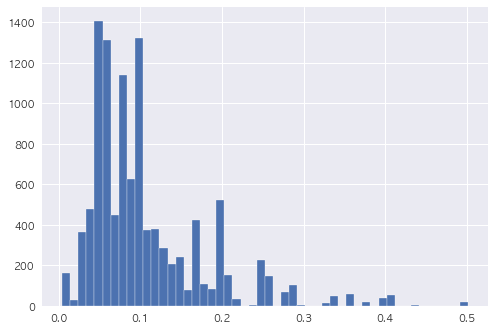

In [32]:
t_sale.loc[t_sale['할인율'] != 0, '할인율'].hist(bins = 50)

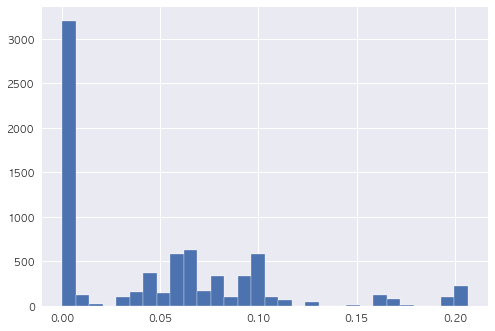

In [33]:
t_sale.loc[t_sale['모델명'].notnull(), '할인율'].hist(bins = 30)

In [ ]:
# 그렇다면 test의 상품이 train에 없을 때에는 어떠한 할인율을 적용해주어야할까?
# 첫번째 방법 -> 마더코드의 평균 할인율 or 상품군의 평균 할인율 or 그 달의 평균 할인율
# 

In [54]:
r_sale = t_sale.loc[t_sale['할인율'].notnull()]

In [58]:
r_sale['할인율'] = r_sale['할인율'].astype(float)

/Users/jinseok/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
